# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [187]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [188]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

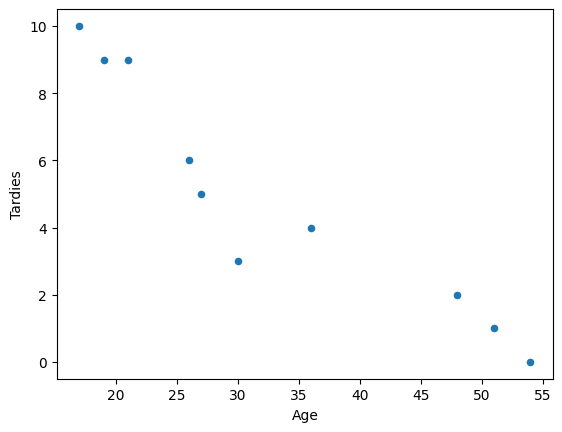

In [189]:
# Your code here
student_data.plot.scatter(x="Age", y="Tardies");

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

I can appreciate something close to a linear regression with a negative inclination but (while the trnd is clear) people aroudn 30 breaks a bit the linear trend

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [190]:
# your code here
# method pearson
corrPears = round(float(student_data["Age"].corr(student_data["Tardies"], method="pearson")), 2)
# method spearman
corrSpear = round(float(student_data["Age"].corr(student_data["Tardies"], method="spearman")), 2)
covariance = student_data.cov()

print("Correlation (Pearson):", corrPears)
print("Correlation (Spearman):", corrSpear)
display(covariance)

# There is an almost perfect negative rank correlation and a very hight negative linear one
# Covariance confirm what we have seen in the correlations with a high negative value in the covariance between the two values

Correlation (Pearson): -0.94
Correlation (Spearman): -0.98


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [191]:
# your explanation here
random_state = 42
X = pd.DataFrame(student_data["Age"]) # Needs to be a dataframe (or at least an array with more than 1 dimension)
y = student_data["Tardies"]

# Split in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, shuffle = False, random_state=random_state)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

13.499999999999996 [-0.25]


Plot your regression model on your scatter plot.

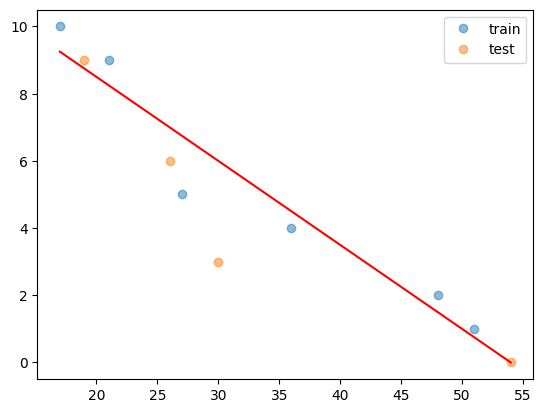

In [192]:
# Your code here.
xmin, xmax = round(X["Age"].min()), round(X["Age"].max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

We can confirm with the model the linear relation between tardiness and age. 
The model has created a negative linear regresion that shows the tendency to be puntual as older you are.
As we have advanced, around 30 the model might not totally fit with the data (is where we see more error distance) but it doesn't affect our overall conclusions.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [193]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [194]:
X_columns = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]
Y_column = "CO2 Emission Grams/Mile"
corr = {}
for column in X_columns:
    corr[column] = {"pearson": round(float(vehicles[column].corr(vehicles[Y_column], method="pearson")), 2),
                    "spearman": round(float(vehicles[column].corr(vehicles[Y_column], method="spearman")), 2)}

display(pd.DataFrame(corr).T)

# Fuel Barrels/Year is the one with stronger correlation (almost perfect for linear, and perfect for rank corr)
# Combined MPG has a string negative rank correlation
# Fuel Cost/Year also has a high correlation
# While Cylinders shows a high relation it could seem low compared with the previous ones
# Year is by far the feature having smaller correlation

,pearson,spearman
Year,-0.22,-0.22
Cylinders,0.75,0.79
Fuel Barrels/Year,0.99,1.00
Combined MPG,-0.93,-1.00
Fuel Cost/Year,0.93,0.92


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [195]:
# Your code here.
random_state = 42

# Given that years has no strong relation I prefer to leave it otside the model
X = vehicles[X_columns]
y = vehicles[Y_column]

X_columns = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle = True, random_state=random_state)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predict with Train Data
y_train_pred = lm.predict(X_train)
train_score = lm.score(X_train, y_train.values.reshape(-1, 1))  # Reshape target variable
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)

# Predict with Test Data
y_test_pred = lm.predict(X_test)
test_score = lm.score(X_test, y_test.values.reshape(-1, 1))  # Reshape target variable
mse_test = mean_squared_error(y_test, y_test_pred)

print("Bias (intercept):", lm.intercept_)
print("\nFeatures Weights (coeficients):")
display(pd.DataFrame(zip(X_columns, lm.coef_)))

print(f"Prediction Score:\nTrain: {train_score} \t Test: {test_score}")
print(f"\nMean Squared Error:\nTrain: {mse_train} \t Test: {mse_test}")

Bias (intercept): 755.6935073143337

Features Weights (coeficients):


,0,1
0,Year,-0.315587
1,Cylinders,1.794026
2,Fuel Barrels/Year,19.231027
3,Combined MPG,-2.933573
4,Fuel Cost/Year,0.031971


Prediction Score:
Train: 0.9812190180453002 	 Test: 0.9794542628636334

Mean Squared Error:
Train: 266.54309246433473 	 Test: 289.82774408137794


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [196]:
# Your code here.
# Based on the prediction score is close to 98% for Train and Test data, that means our model seems to be predicting very well (everything over 80% can be considered good)
# On the Feature Wheights we can se that "Fuel Barrels/Year" is the most influencial one while "Combined MPG" the less one and while correlationg gave a clue about the first one 
# The Mean Square values are too hight, that lows my confidence about the model, probably another kind of regresions would work better

In [197]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train).fit()
ols_summary = ols_model.summary()

ols_summary

# OLS Regression gives different results
# On one side we see all the Features are very good for the prediction (P>|t| = 0)
# We still see "Fuel Barrels/Year" beigh the most relevant feature (coeficient) and "Combined MPG"  as the less one.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.960e+06
Date:                     Thu, 29 May 2025   Prob (F-statistic):                        0.00
Time:                             17:18:07   Log-Likelihood:                     -1.2174e+05
No. Observations:                    28761   AIC:                                  2.435e+05
Df Residuals:                        28756   BIC:                                  2.435e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0607      0.001     64.823      0.000       0.059       0.063
Cylinders             0.8274      0.090      9.227      0.000       0.652       1.003
Fuel Barrels/Year    20.0363      0.066    305.443      0.000      19.908      20.165
Combined MPG         -2.9317      0.048    -61.407      0.000      -3.025      -2.838
Fuel Cost/Year        0.0289      0.001     53.559      0.000       0.028       0.030
==============================================================================
Omnibus:                    59660.012   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        276321985.860
Skew:                          17.692   Prob(JB):                         0.00
Kurtosis:                     481.883   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [198]:
# Your code here.
df = pd.DataFrame({"people_invited":[1,3,4,6,8,9,11,14], "attendants":[1,2,4,4,5,7,8,13]})
df

,people_invited,attendants
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

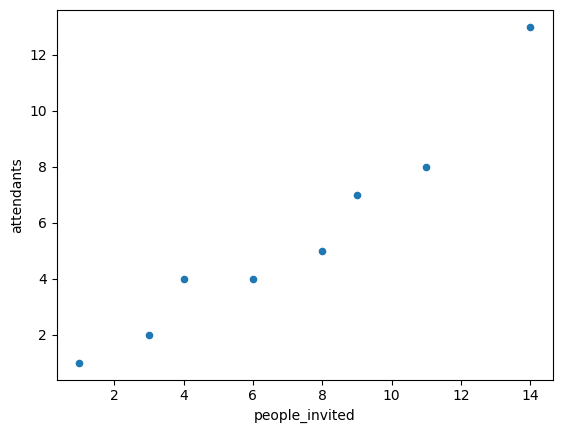

In [199]:
# Your code here.
df.plot.scatter(x="people_invited", y="attendants");

-0.38023952095808244 [0.84730539]
0.9930868801319517 0.043206999175302255


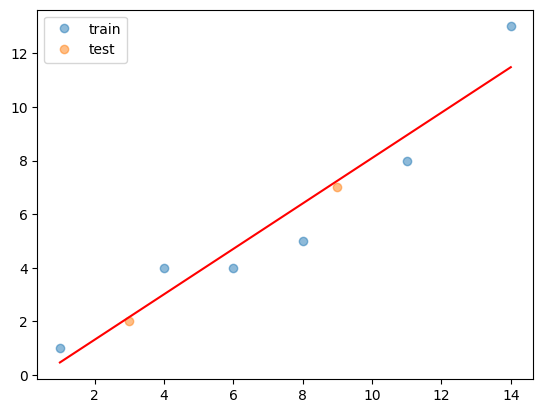

In [200]:
random_state = 42
X = pd.DataFrame(df["people_invited"]) # Needs to be a dataframe (or at least an array with more than 1 dimension)
y = df["attendants"]

# Split in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle = True, random_state=random_state)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

# Predict
y_pred = lm.predict(pd.DataFrame(X))
y_test_pred = lm.predict(pd.DataFrame(X_test))
test_score = lm.score(X_test, y_test) 
mse_test = mean_squared_error(y_test, y_test_pred)
print(test_score, mse_test)

plt.plot(X_train, y_train, "o", alpha=0.5, label="train")
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") 
plt.plot(X, y_pred,'r'); 

plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Yes, we can see a line that shows the linear relation between all the points

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

0.9813084112149539 [0.58878505]
0.9321676213445884 0.46728971962616833


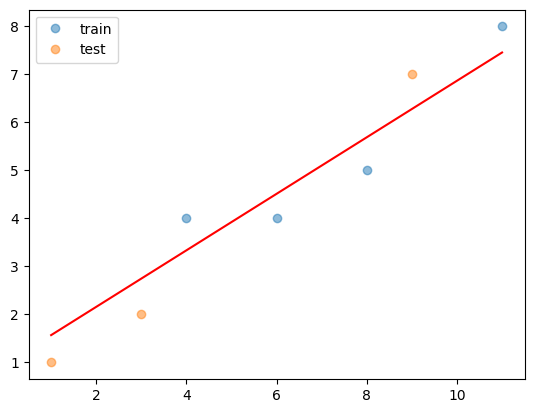

In [207]:
# The point that is more far away (14, 12)
random_state = 42

# Filter data point
df2 = df[df["attendants"] < 10]

X = pd.DataFrame(df2["people_invited"]) # Needs to be a dataframe (or at least an array with more than 1 dimension)
y = df2["attendants"]

#  Split in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, shuffle = True, random_state=random_state)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

# Predict
y_pred = lm.predict(pd.DataFrame(X))
y_test_pred = lm.predict(pd.DataFrame(X_test))
test_score = lm.score(X_test, y_test) 
mse_test = mean_squared_error(y_test, y_test_pred)
print(test_score, mse_test)

plt.plot(X_train, y_train, "o", alpha=0.5, label="train")
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") 
plt.plot(X, y_pred,'r'); 

plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Our model seems to predict a bit worst 93% vs 98% but is also seems to be very adjusted to the points it has also increased the mean square error (0.46 vs 0.043) so it seems previous model was a better one